In [16]:
import pandas as pd
import numpy as np

In [17]:
df=pd.read_csv("german_credit_data.csv")
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [18]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [19]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

### Not Removing null values because its show whether person have saving or checkING account or not

In [20]:
df['Purpose'].unique().sum()

'radio/TVeducationfurniture/equipmentcarbusinessdomestic appliancesrepairsvacation/others'

In [21]:
df['Sex'] = df['Sex'].replace({'male': 1, 'female': 2})
df['Housing'] = df['Housing'].replace({'own': 2, 'free': 1, 'rent': 3})
df['Saving accounts'] = df['Saving accounts'].replace({'little': 1, 'moderate': 2,'rich':3,'quite rich':4})
df['Checking account'] = df['Checking account'].replace({'little': 1, 'moderate': 2,'rich':3})
df['Risk'] = df['Risk'].replace({'good': 1, 'bad': 2})
df['Purpose']=df['Purpose'].replace({'radio/TV':0,'education':1,'furniture/equipment':2,'car':3,'business':4,'domestic appliances':5,'repairs':6,'vacation/others':7})
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,2,NaN,1.0,1169,6,0,1
1,22,2,2,2,1.0,2.0,5951,48,0,2
2,49,1,1,2,1.0,NaN,2096,12,1,1
3,45,1,2,1,1.0,1.0,7882,42,2,1
4,53,1,2,1,1.0,1.0,4870,24,3,2
...,...,...,...,...,...,...,...,...,...,...
995,31,2,1,2,1.0,NaN,1736,12,2,1
996,40,1,3,2,1.0,1.0,3857,30,3,1
997,38,1,2,2,1.0,NaN,804,12,0,1
998,23,1,2,1,1.0,1.0,1845,45,0,2


                       Age       Sex       Job   Housing  Saving accounts   
Age               1.000000 -0.161694  0.015673 -0.301419         0.037279  \
Sex              -0.161694  1.000000 -0.070298  0.219844        -0.017152   
Job               0.015673 -0.070298  1.000000 -0.107191        -0.037338   
Housing          -0.301419  0.219844 -0.107191  1.000000         0.034538   
Saving accounts   0.037279 -0.017152 -0.037338  0.034538         1.000000   
Checking account  0.008451 -0.002425 -0.022126 -0.045734         0.155945   
Credit amount     0.032716 -0.093482  0.285385 -0.135632        -0.065134   
Duration         -0.036136 -0.081432  0.210910 -0.157049        -0.029050   
Purpose           0.071069 -0.051436  0.024629 -0.041397        -0.003972   
Risk             -0.091127  0.075493  0.032735  0.019315        -0.138183   

                  Checking account  Credit amount  Duration   Purpose   
Age                       0.008451       0.032716 -0.036136  0.071069  \
Sex   

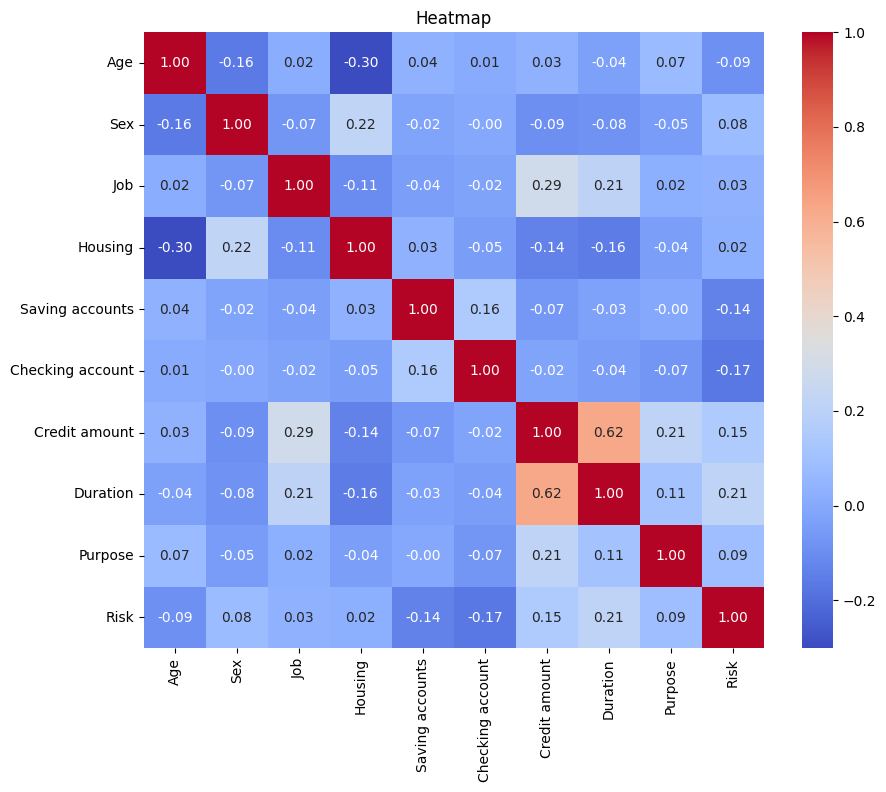

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap')
plt.show()

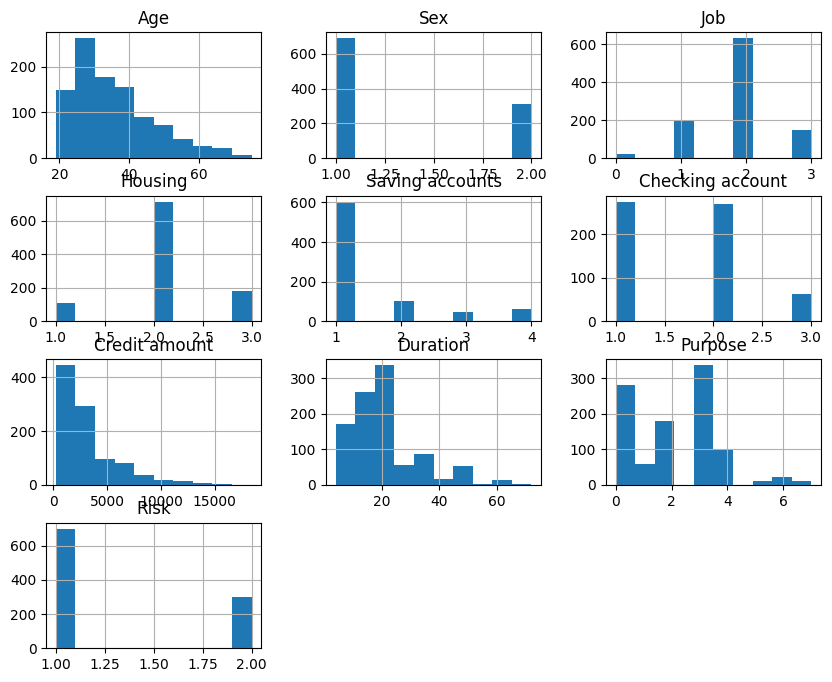

In [23]:
# Histogram for numeric columns
df.hist(figsize=(10, 8))
plt.show()


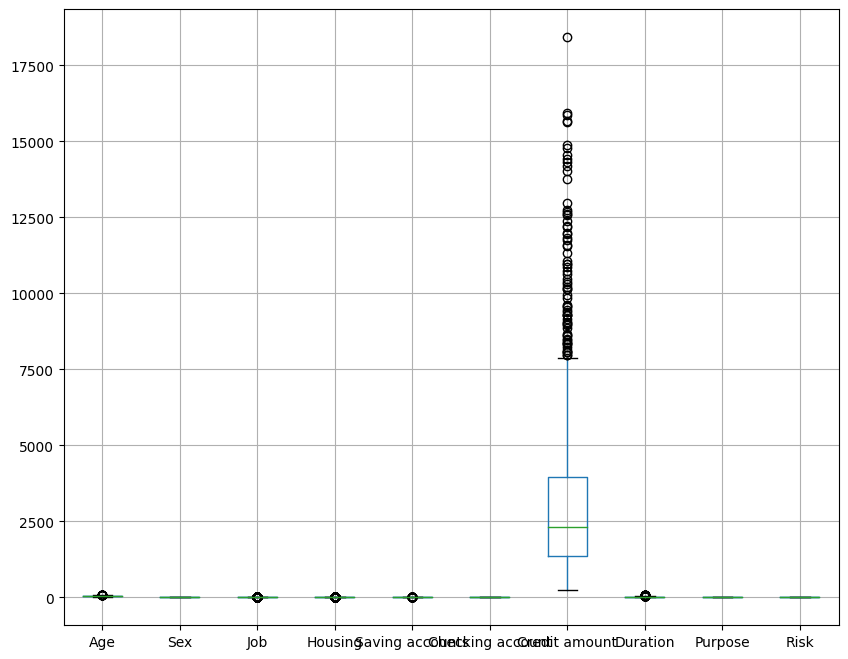

In [24]:
# Boxplot for numeric columns
plt.figure(figsize=(10, 8))
df.boxplot()
plt.show()


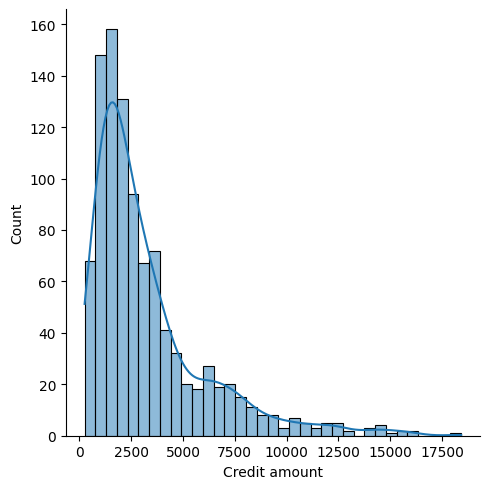

In [25]:
# Distribution plot for a numeric column
sns.displot(df['Credit amount'], kde=True)
plt.show()


In [26]:

from sklearn.model_selection import train_test_split
features = ['Duration', 'Credit amount','Purpose','Saving accounts','Sex']
target = 'Risk'
df = df.dropna(subset=features + [target])
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [27]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


model1 = LogisticRegression()
model1.fit(X_train, y_train)

y_pred = model1.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)



Accuracy: 0.7134146341463414

Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.95      0.82       110
           2       0.71      0.22      0.34        54

    accuracy                           0.71       164
   macro avg       0.71      0.59      0.58       164
weighted avg       0.71      0.71      0.66       164



In [28]:
train_predictions = model1.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_report = classification_report(y_train, train_predictions)

# Evaluate the model on testing data
test_predictions = model1.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_report = classification_report(y_test, test_predictions)

# Print the performance metrics
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:")
print(train_report)
print("\nTesting Accuracy:", test_accuracy)
print("Testing Classification Report:")
print(test_report)

# Check for underfitting or overfitting
if train_accuracy > test_accuracy:
    print("Model might be overfitting.")
elif train_accuracy < test_accuracy:
    print("Model might be underfitting.")
else:
    print("Model is performing consistently on both training and testing sets.")

Training Accuracy: 0.6967840735068913
Training Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.92      0.80       439
           2       0.60      0.23      0.34       214

    accuracy                           0.70       653
   macro avg       0.65      0.58      0.57       653
weighted avg       0.67      0.70      0.65       653


Testing Accuracy: 0.7134146341463414
Testing Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.95      0.82       110
           2       0.71      0.22      0.34        54

    accuracy                           0.71       164
   macro avg       0.71      0.59      0.58       164
weighted avg       0.71      0.71      0.66       164

Model might be underfitting.


In [29]:
from sklearn.svm import SVC
model2 = SVC() 
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)

Accuracy: 0.6890243902439024

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.98      0.81       110
           2       0.71      0.09      0.16        54

    accuracy                           0.69       164
   macro avg       0.70      0.54      0.49       164
weighted avg       0.70      0.69      0.60       164



In [30]:
train_predictions = model2.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_report = classification_report(y_train, train_predictions)

# Evaluate the model on testing data
test_predictions = model2.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_report = classification_report(y_test, test_predictions)

# Print the performance metrics
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:")
print(train_report)
print("\nTesting Accuracy:", test_accuracy)
print("Testing Classification Report:")
print(test_report)

# Check for underfitting or overfitting
if train_accuracy > test_accuracy:
    print("Model might be overfitting.")
elif train_accuracy < test_accuracy:
    print("Model might be underfitting.")
else:
    print("Model is performing consistently on both training and testing sets.")

Training Accuracy: 0.6921898928024502
Training Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.98      0.81       439
           2       0.70      0.11      0.19       214

    accuracy                           0.69       653
   macro avg       0.69      0.54      0.50       653
weighted avg       0.69      0.69      0.61       653


Testing Accuracy: 0.6890243902439024
Testing Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.98      0.81       110
           2       0.71      0.09      0.16        54

    accuracy                           0.69       164
   macro avg       0.70      0.54      0.49       164
weighted avg       0.70      0.69      0.60       164

Model might be overfitting.


In [31]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import accuracy_score, classification_report


model3 = RandomForestClassifier()  
model3.fit(X_train, y_train)

y_pred = model3.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)

Accuracy: 0.6707317073170732

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.78      0.76       110
           2       0.50      0.44      0.47        54

    accuracy                           0.67       164
   macro avg       0.62      0.61      0.62       164
weighted avg       0.66      0.67      0.67       164



In [32]:
train_predictions = model3.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_report = classification_report(y_train, train_predictions)

# Evaluate the model on testing data
test_predictions = model3.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_report = classification_report(y_test, test_predictions)

# Print the performance metrics
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:")
print(train_report)
print("\nTesting Accuracy:", test_accuracy)
print("Testing Classification Report:")
print(test_report)

# Check for underfitting or overfitting
if train_accuracy > test_accuracy:
    print("Model might be overfitting.")
elif train_accuracy < test_accuracy:
    print("Model might be underfitting.")
else:
    print("Model is performing consistently on both training and testing sets.")

Training Accuracy: 1.0
Training Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       439
           2       1.00      1.00      1.00       214

    accuracy                           1.00       653
   macro avg       1.00      1.00      1.00       653
weighted avg       1.00      1.00      1.00       653


Testing Accuracy: 0.6707317073170732
Testing Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.78      0.76       110
           2       0.50      0.44      0.47        54

    accuracy                           0.67       164
   macro avg       0.62      0.61      0.62       164
weighted avg       0.66      0.67      0.67       164

Model might be overfitting.


In [33]:
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier() 
model4.fit(X_train, y_train)

y_pred = model4.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)

Accuracy: 0.6463414634146342

Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.84      0.76       110
           2       0.44      0.26      0.33        54

    accuracy                           0.65       164
   macro avg       0.57      0.55      0.54       164
weighted avg       0.61      0.65      0.62       164



In [34]:
train_predictions = model4.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_report = classification_report(y_train, train_predictions)

# Evaluate the model on testing data
test_predictions = model4.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_report = classification_report(y_test, test_predictions)

# Print the performance metrics
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:")
print(train_report)
print("\nTesting Accuracy:", test_accuracy)
print("Testing Classification Report:")
print(test_report)

# Check for underfitting or overfitting
if train_accuracy > test_accuracy:
    print("Model might be overfitting.")
elif train_accuracy < test_accuracy:
    print("Model might be underfitting.")
else:
    print("Model is performing consistently on both training and testing sets.")

Training Accuracy: 0.7611026033690659
Training Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.91      0.84       439
           2       0.71      0.46      0.56       214

    accuracy                           0.76       653
   macro avg       0.74      0.68      0.70       653
weighted avg       0.75      0.76      0.75       653


Testing Accuracy: 0.6463414634146342
Testing Classification Report:
              precision    recall  f1-score   support

           1       0.70      0.84      0.76       110
           2       0.44      0.26      0.33        54

    accuracy                           0.65       164
   macro avg       0.57      0.55      0.54       164
weighted avg       0.61      0.65      0.62       164

Model might be overfitting.


In [35]:
from sklearn.naive_bayes import GaussianNB 
model5 = GaussianNB() 
model5.fit(X_train, y_train)

y_pred = model5.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(report)

Accuracy: 0.7195121951219512

Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.90      0.81       110
           2       0.63      0.35      0.45        54

    accuracy                           0.72       164
   macro avg       0.69      0.63      0.63       164
weighted avg       0.70      0.72      0.69       164



In [36]:
train_predictions = model5.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_report = classification_report(y_train, train_predictions)

# Evaluate the model on testing data
test_predictions = model5.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_report = classification_report(y_test, test_predictions)

# Print the performance metrics
print("Training Accuracy:", train_accuracy)
print("Training Classification Report:")
print(train_report)
print("\nTesting Accuracy:", test_accuracy)
print("Testing Classification Report:")
print(test_report)

# Check for underfitting or overfitting
if train_accuracy > test_accuracy:
    print("Model might be overfitting.")
elif train_accuracy < test_accuracy:
    print("Model might be underfitting.")
else:
    print("Model is performing consistently on both training and testing sets.")

Training Accuracy: 0.6906584992343032
Training Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.88      0.79       439
           2       0.55      0.30      0.39       214

    accuracy                           0.69       653
   macro avg       0.64      0.59      0.59       653
weighted avg       0.67      0.69      0.66       653


Testing Accuracy: 0.7195121951219512
Testing Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.90      0.81       110
           2       0.63      0.35      0.45        54

    accuracy                           0.72       164
   macro avg       0.69      0.63      0.63       164
weighted avg       0.70      0.72      0.69       164

Model might be underfitting.


In [37]:

new_data = {
    'Duration': [15, 30, 45],
    'Credit amount': [2000, 5000, 8000],
    'Purpose': ['3', '0', '1'],
    'Saving accounts': ['1', '2', '3'],
    'Sex': ['1', '2', '1']
}

new_data_df = pd.DataFrame(new_data)


new_data_df = new_data_df[['Duration', 'Credit amount', 'Purpose','Saving accounts', 'Sex']]


new_data_pred = model4.predict(new_data_df)


print("Predicted Risk for New Data:")
print(new_data_pred)


Predicted Risk for New Data:
[1 2 2]
